In [106]:
from Bio import Cluster
from Bio import Phylo
from Bio.Phylo import TreeConstruction as tc
from Bio.Blast import NCBIWWW
from Bio import SearchIO
import numpy as np
import matplotlib.pyplot as plt

In [27]:
tree = Phylo.read("simple.dnd", "newick")
Phylo.draw_ascii(tree)

                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
  ________________________|
 |                        |                         ________________________ C
 |                        |________________________|
_|                                                 |________________________ D
 |
 |                         ________________________ E
 |                        |
 |________________________|________________________ F
                          |
                          |________________________ G



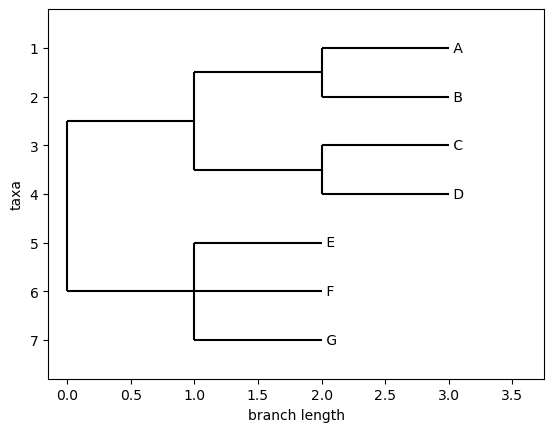

In [28]:
tree.rooted = True
Phylo.draw(tree)

In [31]:
help(tc.DistanceMatrix)

Help on class DistanceMatrix in module Bio.Phylo.TreeConstruction:

class DistanceMatrix(_Matrix)
 |  DistanceMatrix(names, matrix=None)
 |  
 |  Distance matrix class that can be used for distance based tree algorithms.
 |  
 |  All diagonal elements will be zero no matter what the users provide.
 |  
 |  Method resolution order:
 |      DistanceMatrix
 |      _Matrix
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, names, matrix=None)
 |      Initialize the class.
 |  
 |  __setitem__(self, item, value)
 |      Set Matrix's items to values.
 |  
 |  format_phylip(self, handle)
 |      Write data in Phylip format to a given file-like object or handle.
 |      
 |      The output stream is the input distance matrix format used with Phylip
 |      programs (e.g. 'neighbor'). See:
 |      http://evolution.genetics.washington.edu/phylip/doc/neighbor.html
 |      
 |      :Parameters:
 |          handle : file or file-like object
 |              A writeable te

In [125]:
def matrix_parser(file):

    with open(file) as f:
        a = f.read().split("\n")[1:]

    b = [' '.join(i.split()).split(" ") for i in a]

    c = [i[0] for i in b][:-1]

    d = [[float(j) for j in i[1:]] for i in b][:-1]
    e = [[0.0]]+[d[i][:i+1]  for i in range(1,len(d))]

    d = np.matrix(d)

    return d, e, c

In [120]:
d, e, c = matrix_parser("proteins/matrices/all_matrix.txt")

In [121]:
dm = tc.DistanceMatrix(names=c, matrix=e)

In [122]:
constructor = tc.DistanceTreeConstructor(method='upgma')
tree = constructor.upgma(dm)

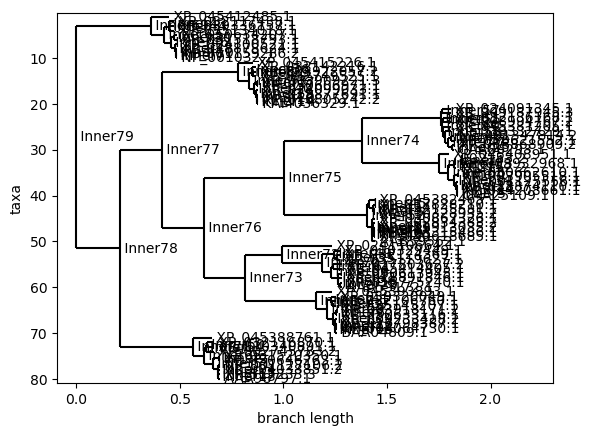

In [123]:
tree.rooted = True
Phylo.draw(tree)

In [104]:
print(d)

[[0.       0.110197 0.011494 ... 0.909688 0.904762 0.889984]
 [0.110197 0.       0.105263 ... 0.902961 0.90625  0.889803]
 [0.011494 0.105263 0.       ... 0.90312  0.906404 0.891626]
 ...
 [0.909688 0.902961 0.90312  ... 0.       0.047123 0.169677]
 [0.904762 0.90625  0.906404 ... 0.047123 0.       0.174795]
 [0.889984 0.889803 0.891626 ... 0.169677 0.174795 0.      ]]


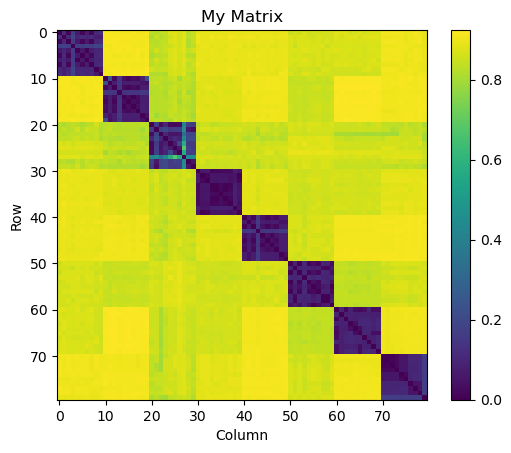

In [116]:
plt.imshow(d, cmap='viridis')
plt.colorbar()
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('My Matrix')

plt.show()

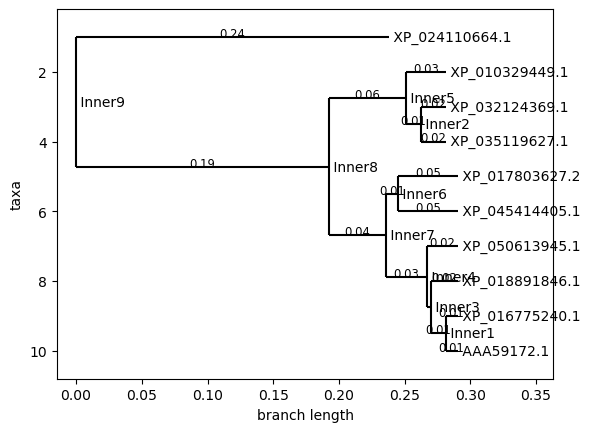

In [134]:
np_matrix, dist_matrix, names = matrix_parser("proteins/matrices/insulin_matrix.txt")
dm = tc.DistanceMatrix(names=names, matrix=dist_matrix)
constructor = tc.DistanceTreeConstructor(method='upgma')
tree = constructor.upgma(dm)
tree.rooted = True
Phylo.draw(tree, branch_labels=lambda c: round(c.branch_length,2))

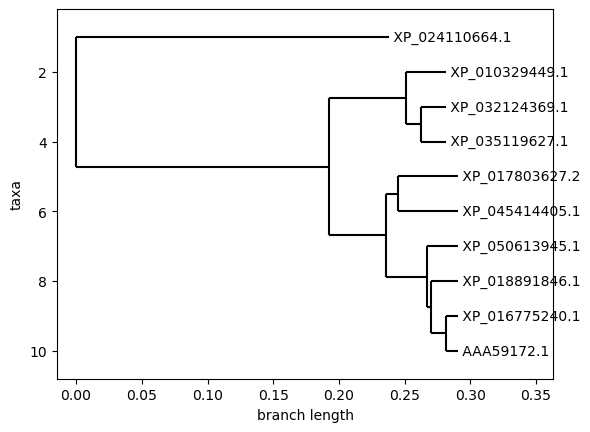

In [135]:
for node in tree.get_nonterminals():
  # Set the node name to an empty string
  node.name = ""

# Plot the tree
Phylo.draw(tree)